In [9]:
import re
import pandas as pd

# ✅ What is re in Python?
# re stands for Regular Expressions — a powerful tool for:
# ✅ searching text
# ✅ finding patterns
# ✅ cleaning text
# ✅ splitting text
# ✅ replacing text
# ✅ extracting specific information

In [10]:
f = open("WhatsApp Chat with Civil official group'26.txt", "r", encoding="utf-8")

In [11]:
data = f.read()

In [23]:
type(data)

str

In [16]:
pattern = "\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{1,2}\s?(?:AM|PM|am|pm)\s-\s"

✅ WhatsApp Timestamp Regex Breakdown
1. \d{1,2}

Matches 1 or 2 digits

Examples: 1, 05, 31

Used for day and month

2. /

Matches a forward slash /

Forms DD/MM or D/M structure

3. \d{2,4}

Matches 2 to 4 digits

Examples: 23, 2024

Used for the year

4. ,\s

Matches:

a comma ,

followed by a space " "

Example: ,

5. \d{1,2}:\d{1,2}

Matches hour:minute

Examples:

8:45

09:15

23:05

6. \s?

Matches zero or one space

Needed because WhatsApp may display:

8:45 PM

8:45PM

Both formats should match ✅

7. (?:AM|PM|am|pm)

Matches AM/PM in any case:

✅ AM

✅ PM

✅ am

✅ pm

8. \s-\s

Matches:

 - 


WhatsApp’s timestamp → message separator

✅ Full Pattern Matches Timestamps Like

✅ 12/05/23, 8:45 PM -

✅ 3/11/2024, 09:15 am -

✅ 9/2/21, 5:01PM -

✅ 1/1/20, 12:00 pm -

✅ Why Is This Important?

This regex helps you split and identify each message in a WhatsApp chat export because every message begins with this timestamp structure.

It is essential for:

✅ Cleaning chat data

✅ Structuring messages

✅ Analyzing conversation patterns

✅ Building your WhatsApp Chat Analyzer

In [14]:
messages = re.split(pattern, data)[1:]

In [18]:
messages[:5]

['Pookie created group "Civil official group\'26"\n',
 'You were added\n',
 'Shubham Charan: C1,C2 tut hogi Hydrology wali\n',
 'Anuj Chahar: Puch rha h ya bta rha h <This message was edited>\n',
 'Shubham Charan: Classroom par dekh le <This message was edited>\n']

In [21]:
import pandas as pd
df = pd.DataFrame(messages, columns=['message'])
df.head(5)

,message
0,"Pookie created group ""Civil official group'26""\n"
1,You were added\n
2,"Shubham Charan: C1,C2 tut hogi Hydrology wali\n"
3,Anuj Chahar: Puch rha h ya bta rha h <This mes...
4,Shubham Charan: Classroom par dekh le <This me...


In [27]:
dates = re.findall(pattern, data)

In [96]:
dates[:5]

['11/9/22, 6:15\u202fPM - ',
 '11/9/22, 6:15\u202fPM - ',
 '7/23/24, 12:15\u202fPM - ',
 '7/23/24, 3:05\u202fPM - ',
 '7/23/24, 3:23\u202fPM - ']

In [29]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format="%m/%d/%y, %I:%M %p - ")
df.rename(columns={'message_date':'date'}, inplace=True)
df.head()

,user_message,date
0,"Pookie created group ""Civil official group'26""\n",2022-11-09 18:15:00
1,You were added\n,2022-11-09 18:15:00
2,"Shubham Charan: C1,C2 tut hogi Hydrology wali\n",2024-07-23 12:15:00
3,Anuj Chahar: Puch rha h ya bta rha h <This mes...,2024-07-23 15:05:00
4,Shubham Charan: Classroom par dekh le <This me...,2024-07-23 15:23:00


In [30]:
# separate user and message
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages

In [31]:
df = df.drop('user_message',axis=1)

In [32]:
df.head()

,date,user,message
0,2022-11-09 18:15:00,group_notification,"Pookie created group ""Civil official group'26""\n"
1,2022-11-09 18:15:00,group_notification,You were added\n
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n"
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n


In [34]:
df['year'] = df['date'].dt.year

In [35]:
df['month'] = df['date'].dt.month_name()

In [36]:
df['day'] = df['date'].dt.day

In [37]:
df['hour'] = df['date'].dt.hour

In [38]:
df['minute'] = df['date'].dt.minute

In [39]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-11-09 18:15:00,group_notification,"Pookie created group ""Civil official group'26""\n",2022,November,9,18,15
1,2022-11-09 18:15:00,group_notification,You were added\n,2022,November,9,18,15
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n",2024,July,23,12,15
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...,2024,July,23,15,5
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n,2024,July,23,15,23


In [40]:
words = []
for message in df['message']:
    words.extend(message.split())

In [41]:
len(words)

21099

In [43]:
pip install urlextract


   ---------------------------------------- 2/2 [urlextract]

Note: you may need to restart the kernel to use updated packages.


In [44]:
from urlextract import URLExtract
extracter = URLExtract()
urls = extracter.find_urls('hi this is myname.com, and gmail.com')

In [45]:
urls

['myname.com', 'gmail.com']

In [46]:
links = []
for message in df['message']:
    links.extend(extracter.find_urls(message))

In [47]:
links

['https://www.instagram.com/reel/C9znq71yqNw/?igsh=MXc0OHZ1cGNuMDJrdg==',
 'https://classroom.google.com/c/NzAxMzY1MzE5NzA5?cjc=xdjkv2c',
 'https://drive.google.com/drive/folders/150LSyUlUUJQ1dDR6bOa22fw8EYMmjhfT?usp=sharing',
 'https://www.instagram.com/reel/C99TdEqSANC/?igsh=MWV1NDd2YjQwdXV4MQ==',
 'https://youtu.be/n0jaQbDYp-E?si=83HjSzDOPfcOBoYq',
 'https://youtu.be/Ea0Z8R4lGUM?feature=shared',
 'https://youtu.be/aXUuWUmUOcE?feature=shared',
 'https://youtu.be/mLzDlUB8xKI?si=zP-WPkfhgkyZl-BQ',
 'B.Tech',
 'https://www.instagram.com/reel/C_KrzreR6oc/?igsh=MWpxODltYTdndjNycw==',
 'https://www.instagram.com/reel/C_2zS3FSW2q/?igsh=MWJ5cmE3bmZiMndjNA==',
 'https://youtu.be/Y7txqHa57zg?feature=shared',
 'https://open.spotify.com/track/02MEFaw29a2aTwNyv6Lb9p?si=FRuxVqTDRK-ZUxg_n1-BSA',
 'https://www.instagram.com/p/DAnW2p3IZZV/?igsh=MXgyN2x5MGV3M2x5bw==',
 'https://youtu.be/rbhBiwgiH5A?si=osHYlBgbcmKagXsN',
 'https://youtu.be/zUECzFHtqzc?feature=shared',
 'https://skribbl.io/?khCbPfN2',
 

In [48]:
df

,date,user,message,year,month,day,hour,minute
0,2022-11-09 18:15:00,group_notification,"Pookie created group ""Civil official group'26""\n",2022,November,9,18,15
1,2022-11-09 18:15:00,group_notification,You were added\n,2022,November,9,18,15
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n",2024,July,23,12,15
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...,2024,July,23,15,5
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n,2024,July,23,15,23
...,...,...,...,...,...,...,...,...
3089,2025-11-03 22:15:00,Debashish Civil,yeh minor project final ppt before end term ka...,2025,November,3,22,15
3090,2025-11-03 22:16:00,Debashish Civil,nahin toh 29 ko Geotech wala ka rakh lo Saturd...,2025,November,3,22,16
3091,2025-11-06 11:15:00,Anuj Chahar,Jinhone presentation de di h unko bhi aana h ?\n,2025,November,6,11,15
3092,2025-11-06 11:15:00,Dharamveer Nitharwal,Yes\n,2025,November,6,11,15


In [49]:
x = df['user'].value_counts().head()

In [50]:
name = x.index
count = x.values

In [51]:
import matplotlib.pyplot as plt

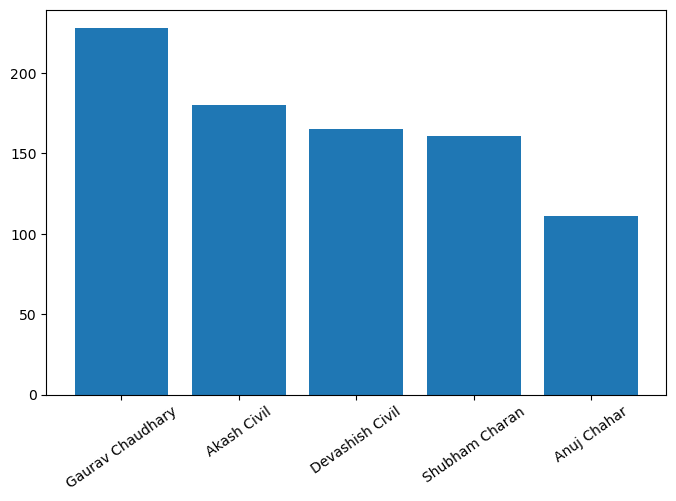

In [54]:
plt.figure(figsize=(8,5))
plt.bar(name, count)
plt.xticks(rotation=35)
plt.show()

In [55]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name', 'user':'percent'})

,percent,count
0,Gaurav Chaudhary,7.37
1,Akash Civil,5.82
2,Devashish Civil,5.33
3,Shubham Charan,5.20
4,Anuj Chahar,3.59
...,...,...
102,Devasish C1,0.06
103,Nitin,0.06
104,Manish Choudhary,0.03
105,MKD,0.03


In [56]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [57]:
temp

,date,user,message,year,month,day,hour,minute
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n",2024,July,23,12,15
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...,2024,July,23,15,5
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n,2024,July,23,15,23
6,2024-07-24 13:41:00,Dharamveer Nitharwal,,2024,July,24,13,41
7,2024-07-24 14:18:00,MMewara,Guys jinka registration nahi hua \nWo ek baar ...,2024,July,24,14,18
...,...,...,...,...,...,...,...,...
3089,2025-11-03 22:15:00,Debashish Civil,yeh minor project final ppt before end term ka...,2025,November,3,22,15
3090,2025-11-03 22:16:00,Debashish Civil,nahin toh 29 ko Geotech wala ka rakh lo Saturd...,2025,November,3,22,16
3091,2025-11-06 11:15:00,Anuj Chahar,Jinhone presentation de di h unko bhi aana h ?\n,2025,November,6,11,15
3092,2025-11-06 11:15:00,Dharamveer Nitharwal,Yes\n,2025,November,6,11,15


In [59]:
import nltk

In [60]:
from nltk.corpus import stopwords

In [61]:
stopwords_eng = stopwords.words('english')

In [62]:
f = open('stop_hinglish.txt',encoding='utf-8')

In [63]:
stop_words_hing = f.read()

In [64]:
len(stopwords_eng)

198

In [65]:
len(stop_words_hing)

6008

In [66]:
len(stopwords_eng) + len(stop_words_hing)

6206

In [67]:
for word in stop_words_hing:
    stopwords_eng.extend(word)

In [68]:
len(stopwords_eng)

6206

In [69]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords_eng:
            words.append(word)

In [70]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,congratulations,629
1,hai,284
2,bhai,250
3,message,244
4,ki,205
5,deleted,187
6,nhi,182
7,se,172
8,main,149
9,ke,143


In [74]:
!pip install emoji

   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ---------------------------------------- 608.4/608.4 kB 6.7 MB/s eta 0:00:00


In [75]:
import emoji

In [77]:
import emoji

emojis = []

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])


In [78]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🎉,447
1,😂,115
2,🥳,109
3,✨,108
4,🎊,56
...,...,...
112,💖,1
113,🎤,1
114,🥹,1
115,🏼,1


In [80]:
df['month_num'] = df['date'].dt.month

In [81]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2022-11-09 18:15:00,group_notification,"Pookie created group ""Civil official group'26""\n",2022,November,9,18,15,11
1,2022-11-09 18:15:00,group_notification,You were added\n,2022,November,9,18,15,11
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n",2024,July,23,12,15,7
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...,2024,July,23,15,5,7
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n,2024,July,23,15,23,7
...,...,...,...,...,...,...,...,...,...
3089,2025-11-03 22:15:00,Debashish Civil,yeh minor project final ppt before end term ka...,2025,November,3,22,15,11
3090,2025-11-03 22:16:00,Debashish Civil,nahin toh 29 ko Geotech wala ka rakh lo Saturd...,2025,November,3,22,16,11
3091,2025-11-06 11:15:00,Anuj Chahar,Jinhone presentation de di h unko bhi aana h ?\n,2025,November,6,11,15,11
3092,2025-11-06 11:15:00,Dharamveer Nitharwal,Yes\n,2025,November,6,11,15,11


In [82]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [83]:
timeline

,year,month_num,month,message
0,2022,11,November,2
1,2024,7,July,21
2,2024,8,August,162
3,2024,9,September,349
4,2024,10,October,89
5,2024,11,November,88
6,2024,12,December,15
7,2025,1,January,68
8,2025,2,February,687
9,2025,3,March,103


In [84]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+str(timeline['year'][i]))

In [85]:
timeline['time'] = time

In [86]:
timeline

,year,month_num,month,message,time
0,2022,11,November,2,November-2022
1,2024,7,July,21,July-2024
2,2024,8,August,162,August-2024
3,2024,9,September,349,September-2024
4,2024,10,October,89,October-2024
5,2024,11,November,88,November-2024
6,2024,12,December,15,December-2024
7,2025,1,January,68,January-2025
8,2025,2,February,687,February-2025
9,2025,3,March,103,March-2025


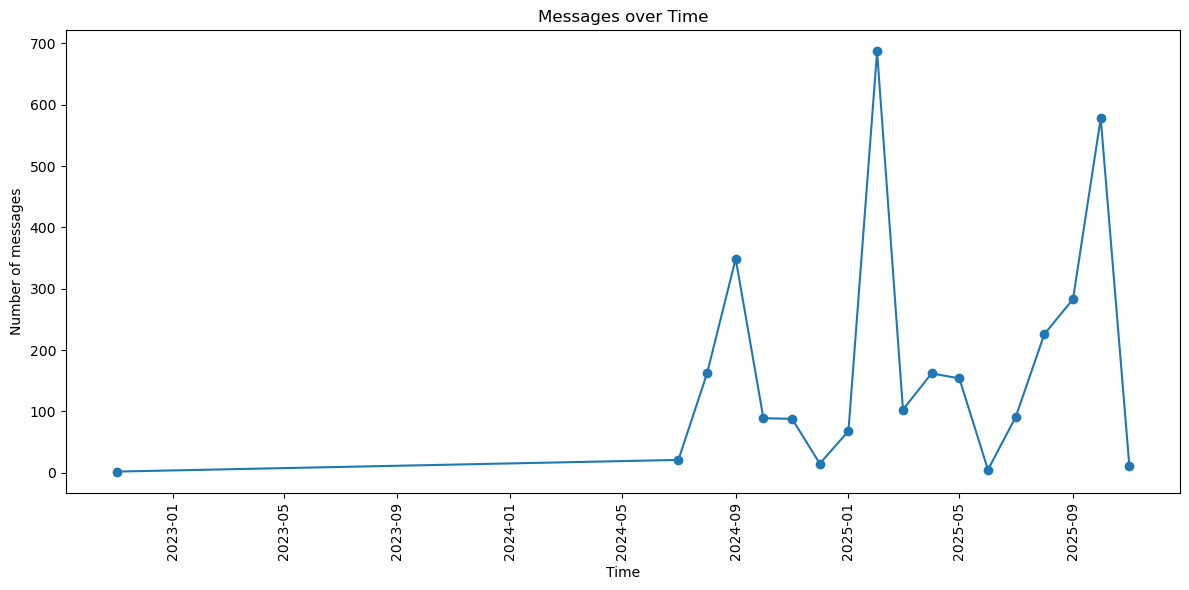

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'time' is datetime
timeline['time'] = pd.to_datetime(timeline['time'])

plt.figure(figsize=(12,6))
plt.plot(timeline['time'], timeline['message'], marker='o')
plt.xlabel('Time')
plt.ylabel('Number of messages')
plt.title('Messages over Time')
plt.xticks(rotation=90)  # rotate X-axis labels
plt.tight_layout()       # prevent labels from being cut off
plt.show()


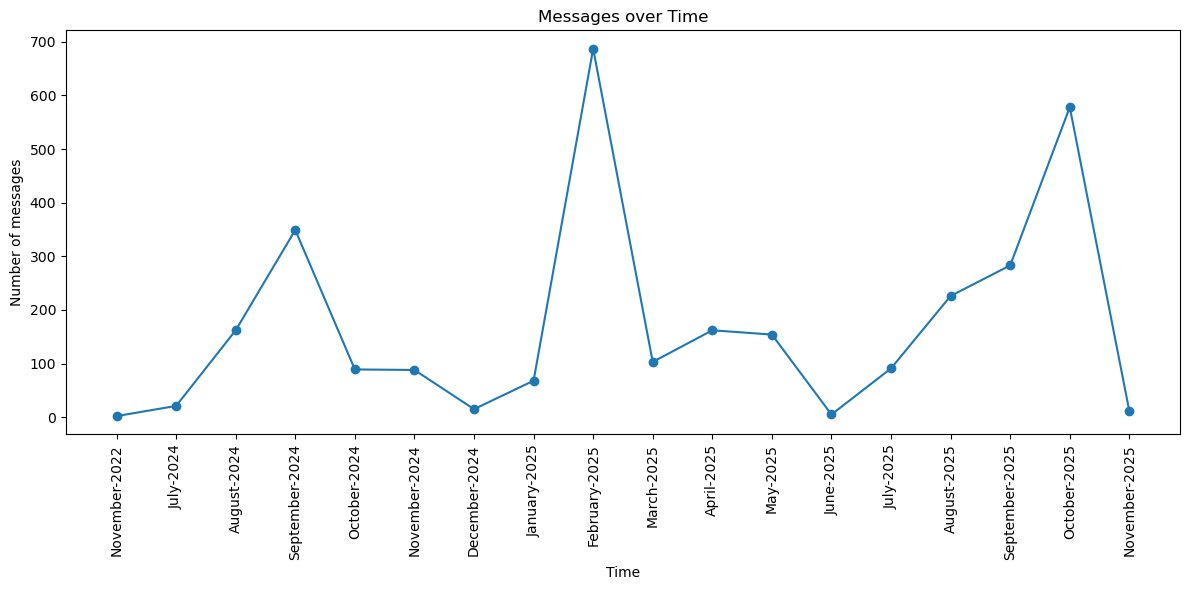

In [88]:
plt.figure(figsize=(12,6))
plt.plot(timeline['time'], timeline['message'], marker='o')  # optional marker for points
plt.xticks(rotation=90)  # rotate X-axis labels
plt.xlabel('Time')
plt.ylabel('Number of messages')
plt.title('Messages over Time')
plt.tight_layout()  # adjusts layout so labels are not cut off
plt.show()


In [92]:
df['only_date'] = df['date'].dt.date

In [93]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-11-09 18:15:00,group_notification,"Pookie created group ""Civil official group'26""\n",2022,November,9,18,15,11,2022-11-09
1,2022-11-09 18:15:00,group_notification,You were added\n,2022,November,9,18,15,11,2022-11-09
2,2024-07-23 12:15:00,Shubham Charan,"C1,C2 tut hogi Hydrology wali\n",2024,July,23,12,15,7,2024-07-23
3,2024-07-23 15:05:00,Anuj Chahar,Puch rha h ya bta rha h <This message was edit...,2024,July,23,15,5,7,2024-07-23
4,2024-07-23 15:23:00,Shubham Charan,Classroom par dekh le <This message was edited>\n,2024,July,23,15,23,7,2024-07-23
...,...,...,...,...,...,...,...,...,...,...
3089,2025-11-03 22:15:00,Debashish Civil,yeh minor project final ppt before end term ka...,2025,November,3,22,15,11,2025-11-03
3090,2025-11-03 22:16:00,Debashish Civil,nahin toh 29 ko Geotech wala ka rakh lo Saturd...,2025,November,3,22,16,11,2025-11-03
3091,2025-11-06 11:15:00,Anuj Chahar,Jinhone presentation de di h unko bhi aana h ?\n,2025,November,6,11,15,11,2025-11-06
3092,2025-11-06 11:15:00,Dharamveer Nitharwal,Yes\n,2025,November,6,11,15,11,2025-11-06


In [94]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

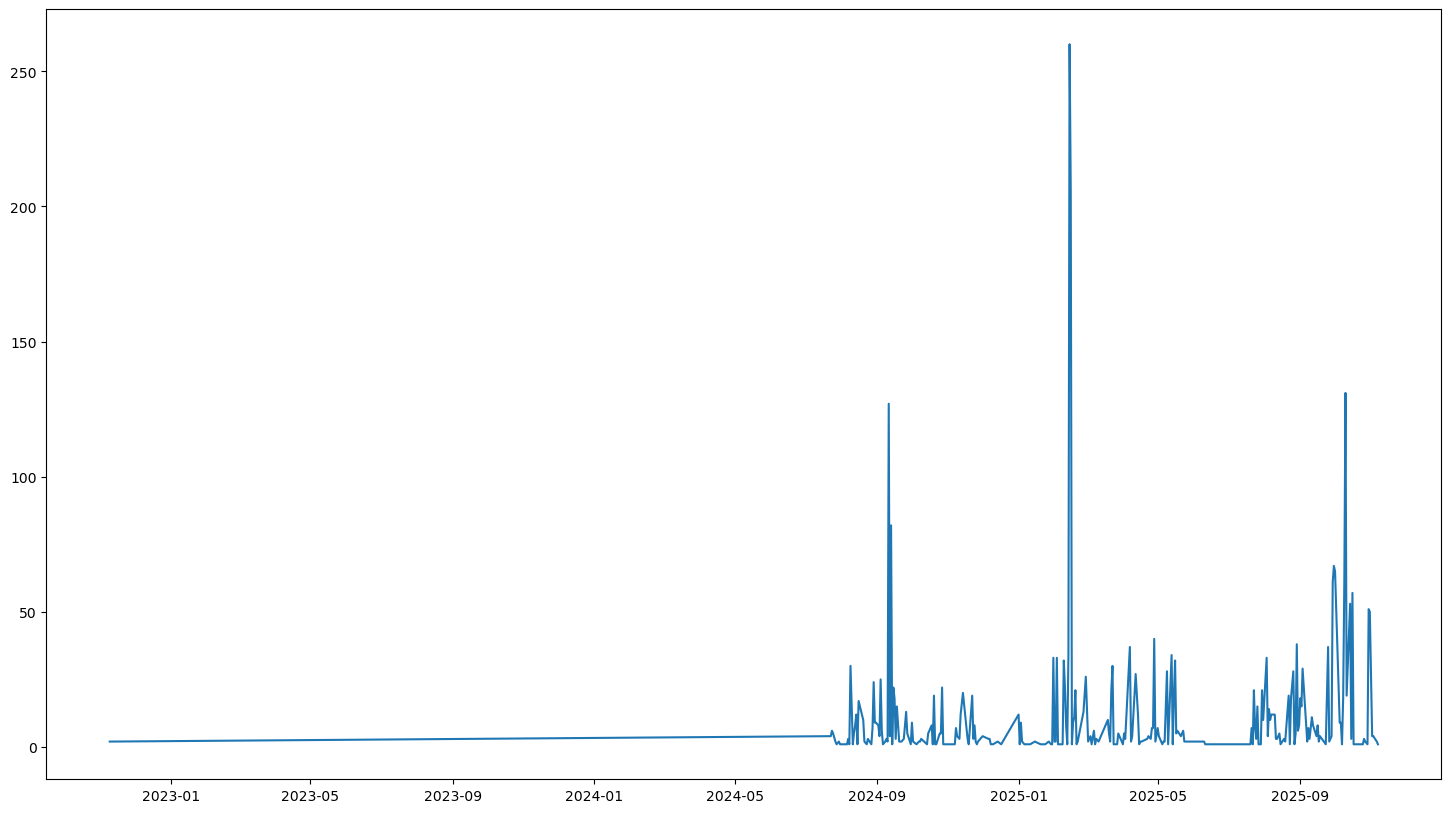

In [95]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'], daily_timeline['message'])